In [2]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=20, # 20個生成
                           n_features=2, # 2次元
                           n_classes=3, # 3クラス
                           n_clusters_per_class=1,#　1クラスにつき1クラスタ
                           n_informative=2, # 相関が強い特徴量(Informative fearture）の数
                           n_redundant=0, # Informative featureの線形結合から作られる特徴量(Redundant fearture）の数。
                           n_repeated=0,   # infomative、redundant featureのコピーからなる特長量の数(Repeated feature)
                           random_state=10   # 乱数種（再現用）
                           )

make_classification 引数の意味は以下参照

http://overlap.hatenablog.jp/entry/2015/10/08/022246

http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py

In [263]:
X, y

(array([[-0.16354986, -0.07370382],
        [-1.04443944, -1.32404192],
        [-0.94577366, -0.75057433],
        [ 0.34450069, -0.30331379],
        [-1.21740882, -1.09740428],
        [-1.02682804, -0.89600313],
        [ 1.00194246,  0.2531625 ],
        [ 0.76006432,  0.94322846],
        [ 1.45165954,  0.86759808],
        [-1.7017166 , -1.56858631],
        [-1.63846497, -1.60594563],
        [ 1.97337436, -1.77359121],
        [ 0.98171087, -1.24639764],
        [ 0.32017725,  1.17594719],
        [ 1.41436311,  0.83542199],
        [ 0.21725575,  0.9014649 ],
        [-0.04167182,  0.05893774],
        [-0.99754818,  0.00472314],
        [-0.80553952, -0.79289756],
        [ 0.76755967, -0.82350683]]),
 array([0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0]))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.brg);

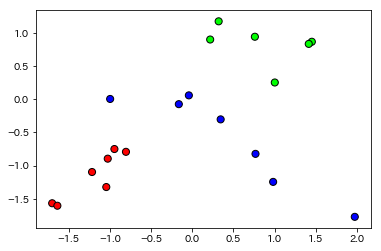

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [5]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, cmap=plt.get_cmap()):

    # plot range
    x_min = min(X[:,0]) - 0.2
    x_max = max(X[:,0]) + 0.2
    y_min = min(X[:,1]) - 0.2
    y_max = max(X[:,1]) + 0.2

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid  
    # ステップ長が複素数（例えば、5j）である場合、その大きさの整数部分は、開始値と停止値との間に作成される点の数を指定するものとして解釈され、停止値は両端値を含む
    # つまり x_min:x_max:200j は x_min から x_max までの間の点が200個になるようにという意味
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 　
    # ravel() でflatte　にして、np.c_で第二軸に沿ってペアを組ませる.
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)
    plt.contour(XX, YY, Z, colors='w') # 境界線をかく
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [6]:
x_min = min(X[:,0])
x_max = max(X[:,0])
y_min = min(X[:,1])
y_max = max(X[:,1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] 
np.c_[XX.ravel(), YY.ravel()]

array([[-1.7017166 , -1.77359121],
       [-1.7017166 , -1.75876941],
       [-1.7017166 , -1.74394761],
       ..., 
       [ 1.97337436,  1.14630359],
       [ 1.97337436,  1.16112539],
       [ 1.97337436,  1.17594719]])

In [7]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

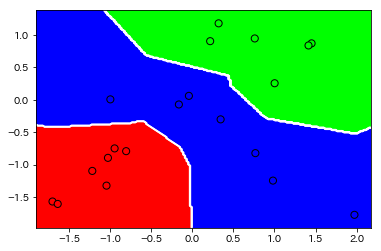

In [8]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

In [17]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(multi_class='multinomial', solver='sag')

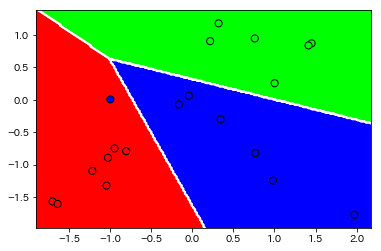

In [18]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

In [15]:
from sklearn import linear_model

clf = linear_model.LogisticRegression()

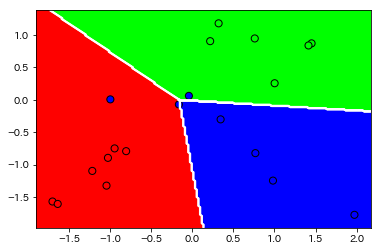

In [16]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

`LogisticRegression`の多クラス問題では`multiclass`が`multinomial`に設定されている場合はクロスエントロピー損失を使用します
defaultではone-vs-restなのでソフトマックス関数を用いた識別をしない．

[multinomialとovrの違い](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html)

In [272]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=10)

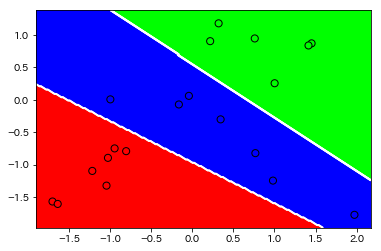

In [273]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

In [274]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=10)

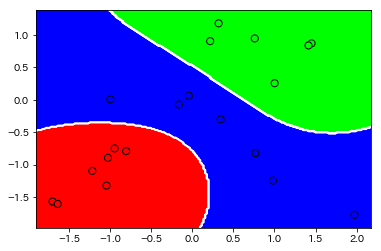

In [275]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

In [21]:
# 境界線を引く関数の定義1

def plotBoundary2(X, clf, boundary=True):
    colors = ['k'];
    linestyles = ['-'];
    levels = [0];

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    n_classes = Z.shape[1]
    
    for c in range(n_classes):
        Zc = Z[:,c].reshape(XX.shape) # just reshape

        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels) # draw lines (level=0:boundary)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

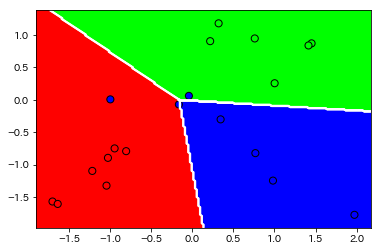

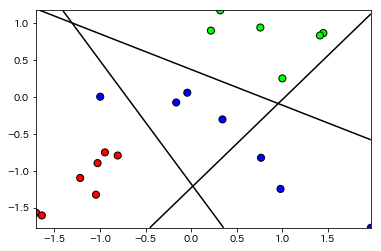

In [22]:
clf = linear_model.LogisticRegression()

clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X, clf)
plt.show()

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary2(X, clf)

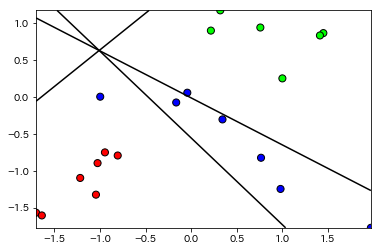

In [38]:
clf=linear_model.LogisticRegression(multi_class='multinomial', solver='saga') # ソフトマックス関数を用いた識別をする?

clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary2(X, clf) 

In [23]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# 境界線を引く関数の定義2

def plotBoundary3(X, clf, mesh=True, boundary=True):
    colors = ['k'];
    linestyles = ['-.', '-', '--'];
    levels = [-1,0,1];
    cmaps = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    print(Z.shape)
    n_classes = Z.shape[1]
    
    for c in range(n_classes):
        Zc = Z[:,c].reshape(XX.shape) # just reshape
        plt.show()
        if mesh:
            plt.pcolormesh(XX, YY, Zc, zorder=-10, cmap=cmaps[c])
            plt.colorbar()
            
        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

(40000, 3)


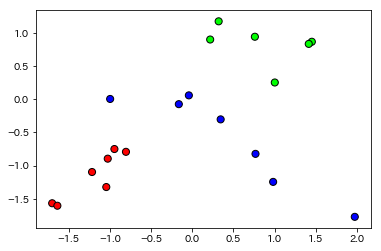

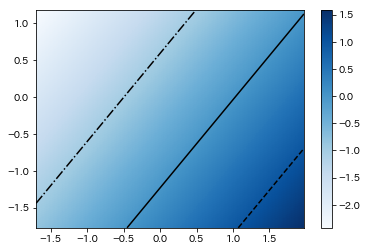

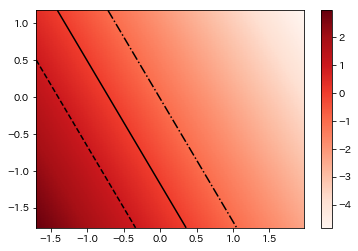

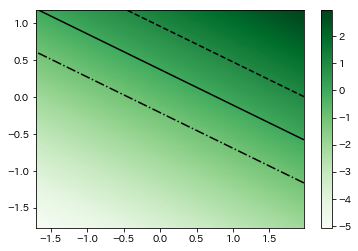

In [25]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary3(X, clf)

In [26]:
# 境界線を引く関数の定義2 predict_probaで

def plotBoundary3(X, clf, mesh=True, boundary=True):
    colors = ['k'];
    linestyles = ['-.', '-', '--'];
    levels = [0.25,0.5,0.75];
    cmaps = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    print(Z.shape)
    n_classes = Z.shape[1]
    
    for c in range(n_classes):
        Zc = Z[:,c].reshape(XX.shape) # just reshape
        plt.show()
        if mesh:
            plt.pcolormesh(XX, YY, Zc, zorder=-10, cmap=cmaps[c])
            plt.colorbar()
            
        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

(40000, 3)


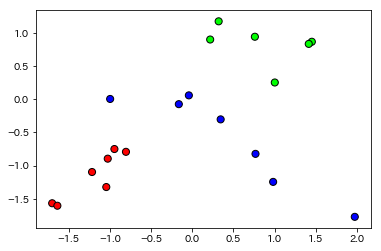

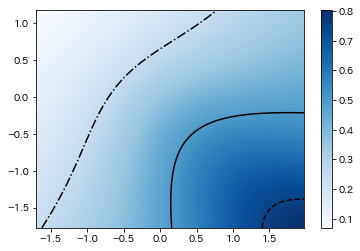

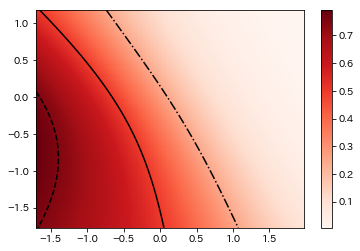

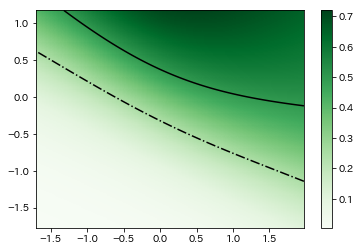

In [295]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary3(X, clf)

(40000, 3)


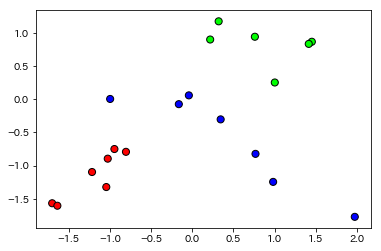

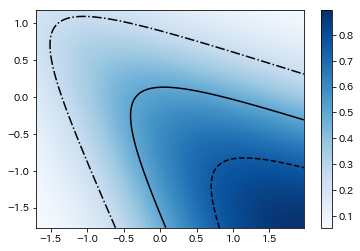

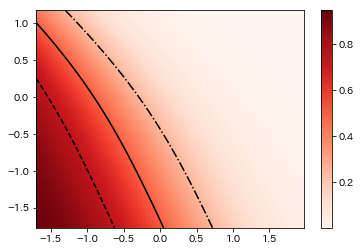

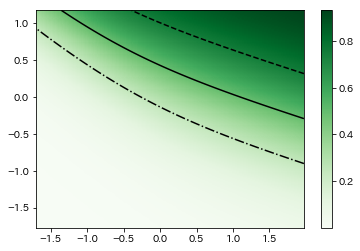

In [36]:
clf = linear_model.LogisticRegression(multi_class='multinomial', solver='saga')
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary3(X, clf)

In [28]:
# 境界線を引く関数の定義3

import numpy.ma as ma # MaskedArray 

def plotBoundary4(X, clf, mesh=True, boundary=True):
    colors = ['k'];
    linestyles = ['-.', '-', '--'];
    levels = [-1,0,1];
    cmaps = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    n_classes = Z.shape[1]
    
    Zmax = Z.argmax(axis=1).reshape(XX.shape)
    
    for c in range(n_classes):
        Zc = ma.array(Z[:,c].reshape(XX.shape), mask=(Zmax != c))
        
        if mesh:
            plt.pcolormesh(XX, YY, Zc, zorder=-10, cmap=cmaps[c])
            
        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

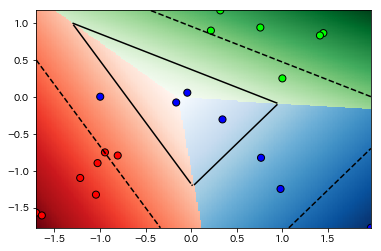

In [29]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary4(X, clf)

`clf = linear_model.LogisticRegression()`では`multi_class='multinomial'`としないと`pridict_proba`はsoftmax関数を用いたものにならない．

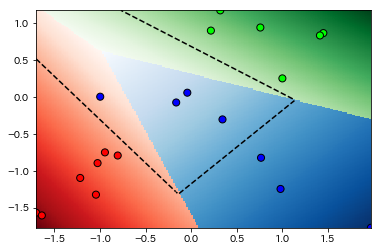

In [35]:
clf = linear_model.LogisticRegression(multi_class='multinomial', solver='sag')

clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary4(X, clf)

In [299]:
clf = svm.SVC(kernel='linear', 
              decision_function_shape='ovr', C=10) # 実はdefaultで ovrになっている
clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(40000, 3)


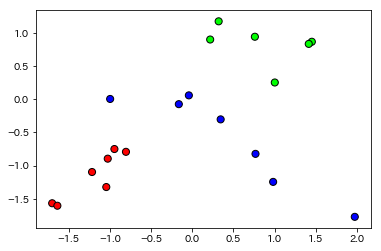

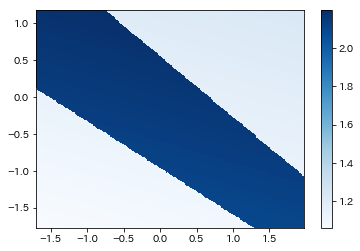

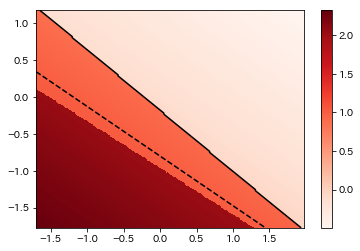

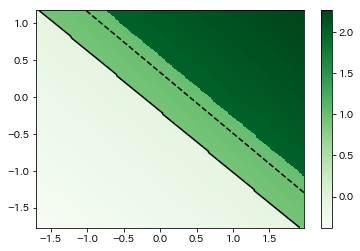

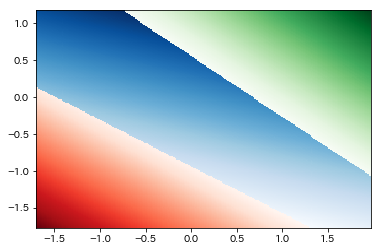

In [300]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary3(X, clf)
plt.show()

plotBoundary4(X, clf)

In [301]:
# RBFカーネルでは...
clf = svm.SVC(kernel='rbf', 
              decision_function_shape='ovr', C=10)
clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(40000, 3)


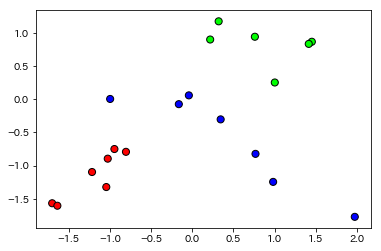

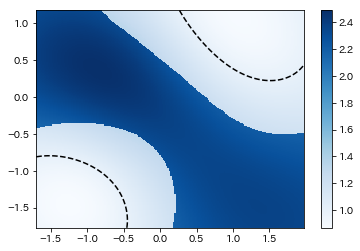

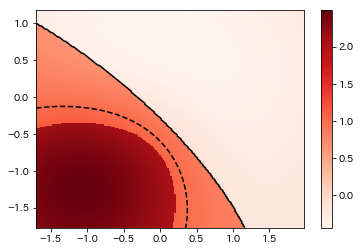

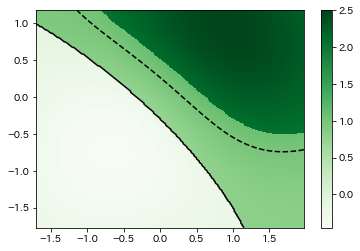

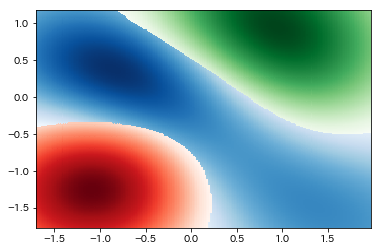

In [302]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary3(X, clf)
plt.show()
plotBoundary4(X, clf)

ovo or ovr

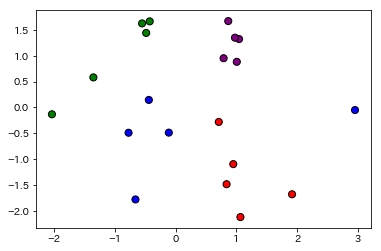

In [321]:
X, y = make_classification(n_samples=20, # 20個生成
                           n_features=2, # 2次元
                           n_classes=4, # 4クラス
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           random_state=8   # 乱数種（再現用）
                           )

from matplotlib.colors import ListedColormap as lcmap
brgp = lcmap(['blue','red','green','purple'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=brgp, edgecolors='k');

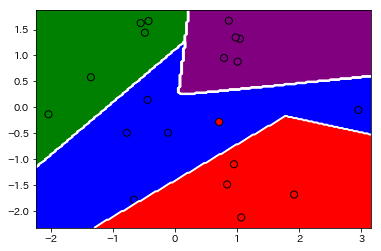

(40000, 4)


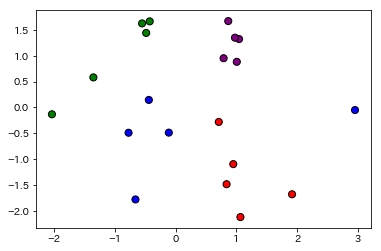

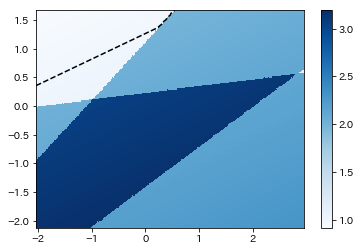

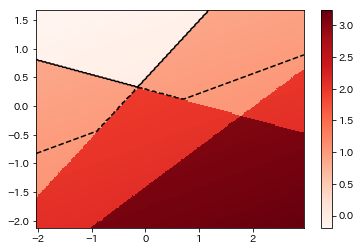

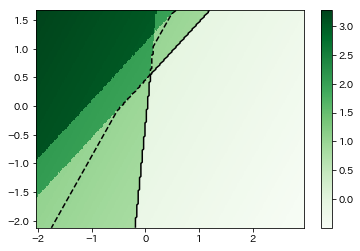

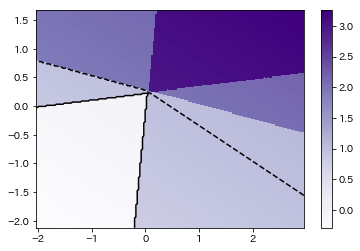

In [322]:
clf = svm.SVC(kernel='linear', 
              decision_function_shape='ovr') # one-vs-rest, one-vs-all
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, cmap=brgp, edgecolors='k')
plotBoundary(X, clf, cmap=brgp)
plt.show()

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, cmap=brgp, edgecolors='k')
plotBoundary3(X, clf)

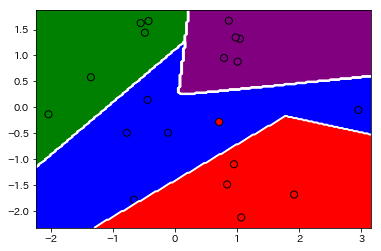

(40000, 6)


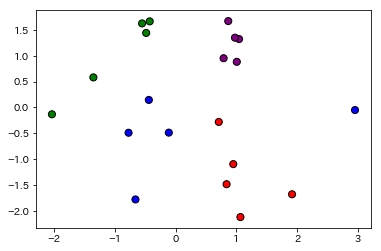

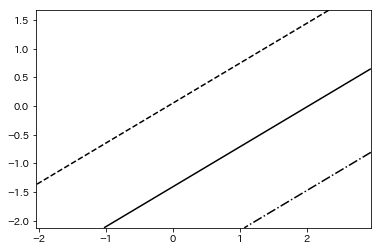

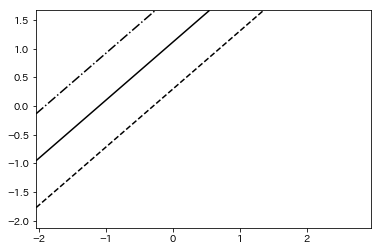

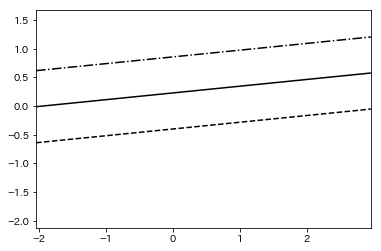

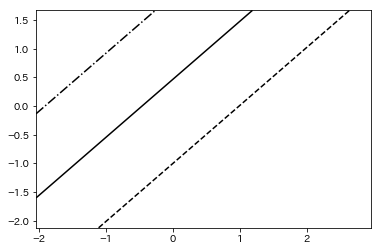

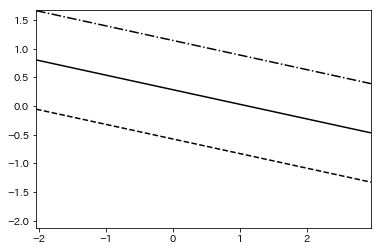

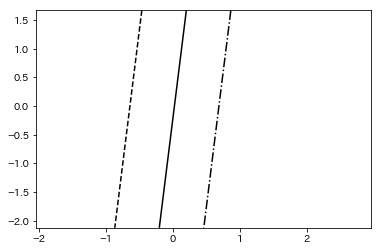

In [323]:
clf = svm.SVC(kernel='linear', 
              decision_function_shape='ovo') # one-vs-one
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, cmap=brgp, edgecolors='k')
plotBoundary(X, clf, cmap=brgp)
plt.show()

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, cmap=brgp, edgecolors='k')
plotBoundary3(X, clf, mesh=False)

In [324]:
from itertools import combinations # 組み合わせをだす関数

In [307]:
list(combinations([0,1,2,3], 2)) # 4C2 を解いている。

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [308]:
list(combinations("ABCD", 2))

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

In [309]:
list(combinations("ABCDEFG", 2))

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'E'),
 ('A', 'F'),
 ('A', 'G'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('B', 'F'),
 ('B', 'G'),
 ('C', 'D'),
 ('C', 'E'),
 ('C', 'F'),
 ('C', 'G'),
 ('D', 'E'),
 ('D', 'F'),
 ('D', 'G'),
 ('E', 'F'),
 ('E', 'G'),
 ('F', 'G')]

itertoolsは順列も出せるようだ。詳しくは以下参照

http://qiita.com/junkls/items/10384950963056cc8e08

以下は講義に関係なし

In [170]:
# np.mgridについて

xx, yy = np.mgrid[0: 10: 1, 0: 10: 1]
# しかし、ステップ長が複素数（例えば、5j）である場合、その大きさの整数部分は、開始値と停止値との間に作成される点の数を指定するものとして解釈され、停止値は両端値を含む
xx

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [171]:
yy

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [172]:
xx.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9])

In [173]:
yy.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])

In [174]:
np.c_[xx.ravel(), yy.ravel()]

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [0, 8],
       [0, 9],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [1, 8],
       [1, 9],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [2, 8],
       [2, 9],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [3, 8],
       [3, 9],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [4, 7],
       [4, 8],
       [4, 9],
       [5, 0],
       [5, 1],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 5],
       [5, 6],
       [5, 7],
       [5, 8],
       [5, 9],
       [6, 0],
       [6, 1],
       [6, 2],
       [6, 3],
       [6, 4],
       [6, 5],
       [6,

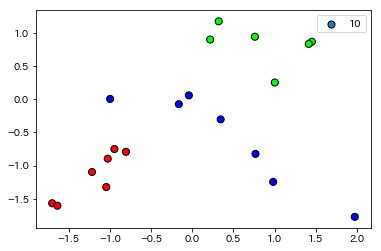

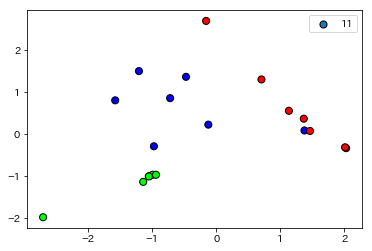

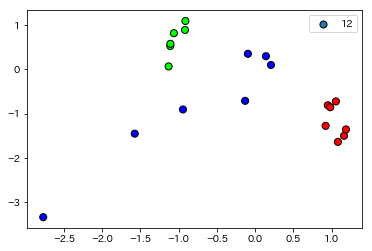

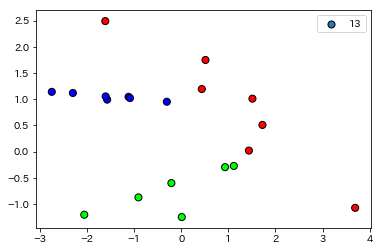

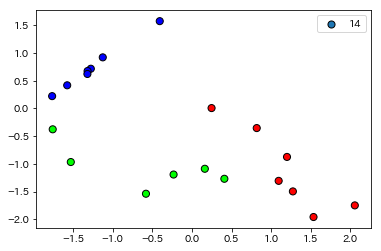

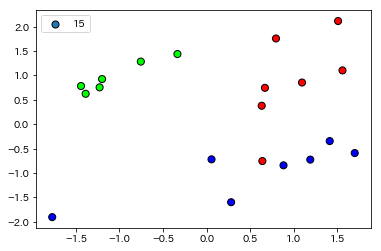

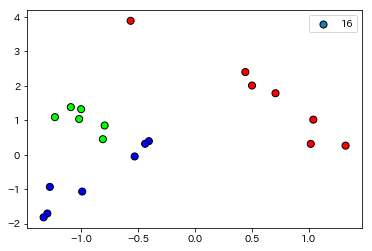

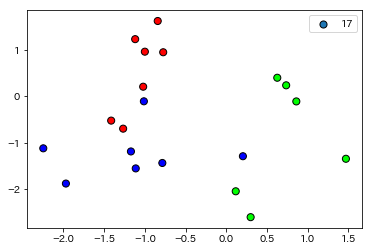

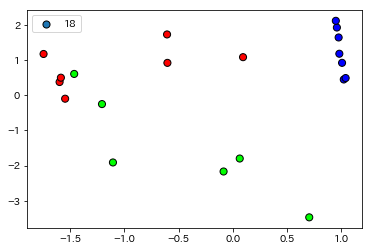

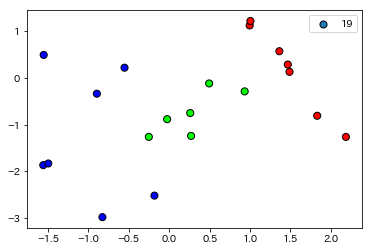

In [261]:
for seed in range(10, 20):
    X, y = make_classification(n_samples=20, # 20個生成
                           n_features=2, # 2次元
                           n_classes=3, # 3クラス
                           n_clusters_per_class=1,
                           n_informative=2, # 相関が強い特徴量(Informative fearture）の数
                           n_redundant=0, # Informative featureの線形結合から作られる特徴量(Redundant fearture）の数。
                           n_repeated=0,   # infomative、Redundant featureのコピーからなる特長量の数(Repeated feature)
                           random_state=seed   # 乱数種（再現用）
                           )
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k', label=seed);
    plt.legend()
    plt.show()